# Optimización de Hiperparámetros con Optuna

Este cuaderno utiliza Optuna para optimizar modelos de clasificación: XGBoost, LightGBM y una red neuronal básica con sklearn, usando el dataset de churn en telecomunicaciones.

In [7]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb


In [8]:
# Dataset de churn en telecomunicaciones (puedes reemplazar la ruta si tienes el archivo local)
url = 'C:\MLOPS\Proyecto_1\data\WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(url)
# Eliminar columnas no necesarias
df.drop(['customerID'], axis=1, inplace=True)

# Convertir TotalCharges a numérico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Codificación de variables categóricas
df = pd.get_dummies(df, drop_first=True)

# Variables
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Optimización de XGBoost con Optuna

In [9]:
def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 400),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    }
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', **params)
    return cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=30)
study_xgb.best_params

[I 2025-03-27 20:37:42,904] A new study created in memory with name: no-name-8439a007-9d49-4319-8a23-f75a249b8d1e
c:\MLOPS\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:37:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\MLOPS\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:37:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\MLOPS\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:37:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-03-27 20:37:43,166] Trial 0 finished with value: 0.7937777777777778 and parameters: {'n_estimators': 102, 'max_depth': 6, 'learning_rate': 0.13

{'n_estimators': 148,
 'max_depth': 4,
 'learning_rate': 0.04896550381842581,
 'subsample': 0.8454015958680345,
 'colsample_bytree': 0.6118693994916786}

## Optimización de LightGBM con Optuna

In [4]:
def objective_lgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 400),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    }
    model = lgb.LGBMClassifier(**params)
    return cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()

study_lgb = optuna.create_study(direction='maximize')
study_lgb.optimize(objective_lgb, n_trials=30)
study_lgb.best_params

[I 2025-03-27 20:34:48,436] A new study created in memory with name: no-name-bed53c00-4971-4140-9baa-bfc84cb65f5b


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000542 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265600 -> initscore=-1.017062
[LightGBM] [Info] Start training from score -1.017062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-03-27 20:34:48,935] Trial 0 finished with value: 0.8008888888888889 and parameters: {'n_estimators': 347, 'max_depth': 6, 'learning_rate': 0.03760256300619222, 'subsample': 0.6962452404712753, 'colsample_bytree': 0.8925839070491273}. Best is trial 0 with value: 0.8008888888888889.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265600 -> initscore=-1.017062
[LightGBM] [Info] Start training from score -1.017062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-03-27 20:34:49,183] Trial 1 finished with value: 0.7845333333333334 and parameters: {'n_estimators': 163, 'max_depth': 9, 'learning_rate': 0.2100136467042997, 'subsample': 0.9166914894348024, 'colsample_bytree': 0.9969512736798722}. Best is trial 0 with value: 0.8008888888888889.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265600 -> initscore=-1.017062
[LightGBM] [Info] Start training from score -1.017062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-03-27 20:34:49,533] Trial 2 finished with value: 0.7827555555555555 and parameters: {'n_estimators': 257, 'max_depth': 7, 'learning_rate': 0.20348223205462285, 'subsample': 0.7669525122605336, 'colsample_bytree': 0.5196607728553688}. Best is trial 0 with value: 0.8008888888888889.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:34:49,866] Trial 3 finished with value: 0.7793777777777778 and parameters: {'n_estimators': 226, 'max_depth': 8, 'learning_rate': 0.24276684936206402, 'subsample': 0.8504562097518398, 'colsample_bytree': 0.8503332674517645}. Best is trial 0 with value: 0.8008888888888889.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:34:50,148] Trial 4 finished with value: 0.7864888888888889 and parameters: {'n_estimators': 234, 'max_depth': 6, 'learning_rate': 0.23734134356292638, 'subsample': 0.9622575589238722, 'colsample_bytree': 0.712138781476658}. Best is trial 0 with value: 0.8008888888888889.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:34:50,681] Trial 5 finished with value: 0.7784888888888889 and parameters: {'n_estimators': 395, 'max_depth': 7, 'learning_rate': 0.21110484979407193, 'subsample': 0.8621260338940485, 'colsample_bytree': 0.612544350795349}. Best is trial 0 with value: 0.8008888888888889.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:34:50,932] Trial 6 finished with value: 0.7868444444444443 and parameters: {'n_estimators': 396, 'max_depth': 3, 'learning_rate': 0.24076011720250243, 'subsample': 0.8279934889237412, 'colsample_bytree': 0.8190381229094184}. Best is trial 0 with value: 0.8008888888888889.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265867 -> initscore=-1.015696
[LightGBM] [Info] Start training from score -1.015696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-03-27 20:34:51,195] Trial 7 finished with value: 0.7776000000000001 and parameters: {'n_estimators': 179, 'max_depth': 7, 'learning_rate': 0.2837890697648782, 'subsample': 0.7291224676699315, 'colsample_bytree': 0.9841139296889787}. Best is trial 0 with value: 0.8008888888888889.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:34:51,542] Trial 8 finished with value: 0.7870222222222222 and parameters: {'n_estimators': 289, 'max_depth': 6, 'learning_rate': 0.16655450930532437, 'subsample': 0.6749177721640379, 'colsample_bytree': 0.705228073061797}. Best is trial 0 with value: 0.8008888888888889.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:34:51,735] Trial 9 finished with value: 0.8032 and parameters: {'n_estimators': 124, 'max_depth': 5, 'learning_rate': 0.04474997218654379, 'subsample': 0.7661159003790857, 'colsample_bytree': 0.765624641644199}. Best is trial 9 with value: 0.8032.
[I 2025-03-27 20:34:51,833] Trial 10 finished with value: 0.8051555555555555 and parameters: {'n_estimators': 118, 'max_depth': 3, 'learning_rate': 0.039695218230621776, 'subsample': 0.5124598020252895, 'colsample_bytree': 0.7700513877192658}. Best is trial 10 with value: 0.8051555555555555.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:34:51,935] Trial 11 finished with value: 0.8024888888888889 and parameters: {'n_estimators': 101, 'max_depth': 3, 'learning_rate': 0.04044385642123375, 'subsample': 0.5243102100538423, 'colsample_bytree': 0.7760922497515542}. Best is trial 10 with value: 0.8051555555555555.
[I 2025-03-27 20:34:52,080] Trial 12 finished with value: 0.8049777777777778 and parameters: {'n_estimators': 114, 'max_depth': 4, 'learning_rate': 0.09023818781448924, 'subsample': 0.5709821580095877, 'colsample_bytree': 0.656652473618569}. Best is trial 10 with value: 0.8051555555555555.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265867 -> initscore=-1.015696
[LightGBM] [Info] Start training from score -1.015696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-03-27 20:34:52,230] Trial 13 finished with value: 0.805688888888889 and parameters: {'n_estimators': 154, 'max_depth': 4, 'learning_rate': 0.09834768112094977, 'subsample': 0.5002378916486984, 'colsample_bytree': 0.6409709396594059}. Best is trial 13 with value: 0.805688888888889.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265600 -> initscore=-1.017062
[LightGBM] [Info] Start training from score -1.017062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-03-27 20:34:52,399] Trial 14 finished with value: 0.8037333333333333 and parameters: {'n_estimators': 166, 'max_depth': 4, 'learning_rate': 0.10103674800423036, 'subsample': 0.6064917074262997, 'colsample_bytree': 0.557155335059708}. Best is trial 13 with value: 0.805688888888889.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265867 -> initscore=-1.015696
[LightGBM] [Info] Start training from score -1.015696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-03-27 20:34:52,600] Trial 15 finished with value: 0.8039111111111111 and parameters: {'n_estimators': 197, 'max_depth': 4, 'learning_rate': 0.09935142110832826, 'subsample': 0.5089265160859359, 'colsample_bytree': 0.6201954477123017}. Best is trial 13 with value: 0.805688888888889.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:34:52,849] Trial 16 finished with value: 0.7937777777777777 and parameters: {'n_estimators': 136, 'max_depth': 10, 'learning_rate': 0.13123767965181798, 'subsample': 0.609448532004307, 'colsample_bytree': 0.668274087147551}. Best is trial 13 with value: 0.805688888888889.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265867 -> initscore=-1.015696
[LightGBM] [Info] Start training from score -1.015696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-03-27 20:34:52,987] Trial 17 finished with value: 0.7886222222222222 and parameters: {'n_estimators': 145, 'max_depth': 3, 'learning_rate': 0.010703678290917507, 'subsample': 0.5687396882856883, 'colsample_bytree': 0.9281748851809415}. Best is trial 13 with value: 0.805688888888889.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:34:53,235] Trial 18 finished with value: 0.8023111111111111 and parameters: {'n_estimators': 202, 'max_depth': 5, 'learning_rate': 0.07571761680697504, 'subsample': 0.6490544615702643, 'colsample_bytree': 0.7298245516362143}. Best is trial 13 with value: 0.805688888888889.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:34:53,537] Trial 19 finished with value: 0.7946666666666666 and parameters: {'n_estimators': 292, 'max_depth': 5, 'learning_rate': 0.14088617663653913, 'subsample': 0.535891541323902, 'colsample_bytree': 0.5830263148924202}. Best is trial 13 with value: 0.805688888888889.
[I 2025-03-27 20:34:53,679] Trial 20 finished with value: 0.8053333333333333 and parameters: {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.0707587152791434, 'subsample': 0.630072179344616, 'colsample_bytree': 0.812090599155811}. Best is trial 13 with value: 0.805688888888889.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265600 -> initscore=-1.017062
[LightGBM] [Info] Start training from score -1.017062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-03-27 20:34:53,801] Trial 21 finished with value: 0.807288888888889 and parameters: {'n_estimators': 102, 'max_depth': 4, 'learning_rate': 0.0682763799538229, 'subsample': 0.6190208386796179, 'colsample_bytree': 0.8170098847741905}. Best is trial 21 with value: 0.807288888888889.
[I 2025-03-27 20:34:53,950] Trial 22 finished with value: 0.8039111111111111 and parameters: {'n_estimators': 148, 'max_depth': 4, 'learning_rate': 0.06934419328482365, 'subsample': 0.6314522470116033, 'colsample_bytree': 0.8249143155305745}. Best is trial 21 with value: 0.807288888888889.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:34:54,111] Trial 23 finished with value: 0.8017777777777777 and parameters: {'n_estimators': 103, 'max_depth': 5, 'learning_rate': 0.12059501418855349, 'subsample': 0.5747355564364829, 'colsample_bytree': 0.8888477381333355}. Best is trial 21 with value: 0.807288888888889.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265600 -> initscore=-1.017062
[LightGBM] [Info] Start training from score -1.017062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-03-27 20:34:54,267] Trial 24 finished with value: 0.7998222222222222 and parameters: {'n_estimators': 140, 'max_depth': 4, 'learning_rate': 0.1622321822407719, 'subsample': 0.6931532083339131, 'colsample_bytree': 0.8177612001133989}. Best is trial 21 with value: 0.807288888888889.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:34:54,547] Trial 25 finished with value: 0.8026666666666666 and parameters: {'n_estimators': 194, 'max_depth': 5, 'learning_rate': 0.061410072528922874, 'subsample': 0.5590330257406984, 'colsample_bytree': 0.679876728537651}. Best is trial 21 with value: 0.807288888888889.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:34:54,745] Trial 26 finished with value: 0.7980444444444443 and parameters: {'n_estimators': 163, 'max_depth': 4, 'learning_rate': 0.011420546631984094, 'subsample': 0.610469542632831, 'colsample_bytree': 0.8857016272692214}. Best is trial 21 with value: 0.807288888888889.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:34:54,850] Trial 27 finished with value: 0.8051555555555555 and parameters: {'n_estimators': 103, 'max_depth': 3, 'learning_rate': 0.11644186870678783, 'subsample': 0.7438809907457771, 'colsample_bytree': 0.9440135187217396}. Best is trial 21 with value: 0.807288888888889.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:34:55,051] Trial 28 finished with value: 0.7998222222222222 and parameters: {'n_estimators': 125, 'max_depth': 6, 'learning_rate': 0.08046997069749809, 'subsample': 0.6513528730123882, 'colsample_bytree': 0.792407160335884}. Best is trial 21 with value: 0.807288888888889.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000139 seconds

[I 2025-03-27 20:34:55,400] Trial 29 finished with value: 0.8008888888888889 and parameters: {'n_estimators': 314, 'max_depth': 5, 'learning_rate': 0.059189445376503516, 'subsample': 0.7154648609998516, 'colsample_bytree': 0.8682923067214702}. Best is trial 21 with value: 0.807288888888889.


{'n_estimators': 102,
 'max_depth': 4,
 'learning_rate': 0.0682763799538229,
 'subsample': 0.6190208386796179,
 'colsample_bytree': 0.8170098847741905}

## Optimización de Red Neuronal (MLPClassifier) con Optuna

In [5]:
def objective_nn(trial):
    hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [(64,), (128,), (64,32)])
    alpha = trial.suggest_float('alpha', 1e-5, 1e-2, log=True)
    learning_rate_init = trial.suggest_float('learning_rate_init', 0.001, 0.1)

    model = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                                                       alpha=alpha,
                                                       learning_rate_init=learning_rate_init,
                                                       max_iter=500, random_state=42))
    return cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()

study_nn = optuna.create_study(direction='maximize')
study_nn.optimize(objective_nn, n_trials=30)
study_nn.best_params

[I 2025-03-27 20:34:55,406] A new study created in memory with name: no-name-de9b56df-15d9-49fe-95a6-d717921dba79
c:\MLOPS\env\Lib\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (64,) which is of type tuple.
  warnings.warn(message)
c:\MLOPS\env\Lib\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (128,) which is of type tuple.
  warnings.warn(message)
c:\MLOPS\env\Lib\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (64, 32) which is of type tuple.
  warnings.warn(message)
[I 2025-03-27 20:34:56,634] Trial 0 finished with value: 0.7552 and parameters: {'hidden_layer_sizes': (64,), 'alpha'

{'hidden_layer_sizes': (64, 32),
 'alpha': 2.9231455541119832e-05,
 'learning_rate_init': 0.07247503858234632}

## Visualización de Importancia de Hiperparámetros

C:\Users\usuario\AppData\Local\Temp\ipykernel_14812\3701761657.py:5: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  fig_xgb = vis.plot_param_importances(study_xgb)


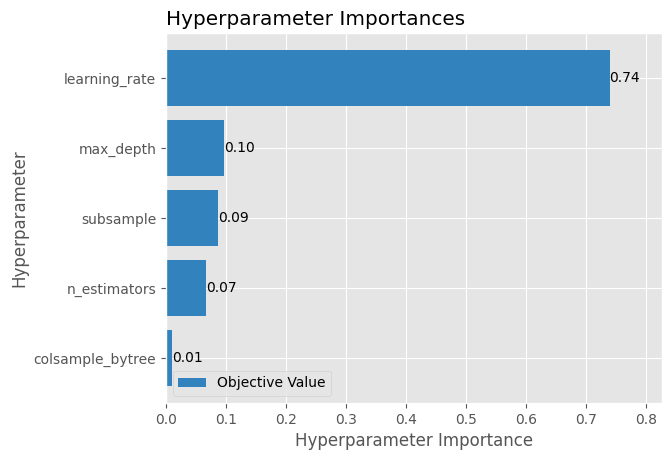

C:\Users\usuario\AppData\Local\Temp\ipykernel_14812\3701761657.py:10: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  fig_lgb = vis.plot_param_importances(study_lgb)


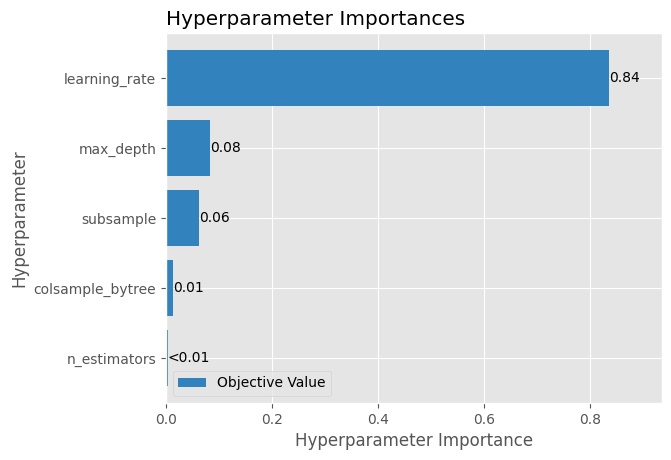

C:\Users\usuario\AppData\Local\Temp\ipykernel_14812\3701761657.py:15: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  fig_nn = vis.plot_param_importances(study_nn)


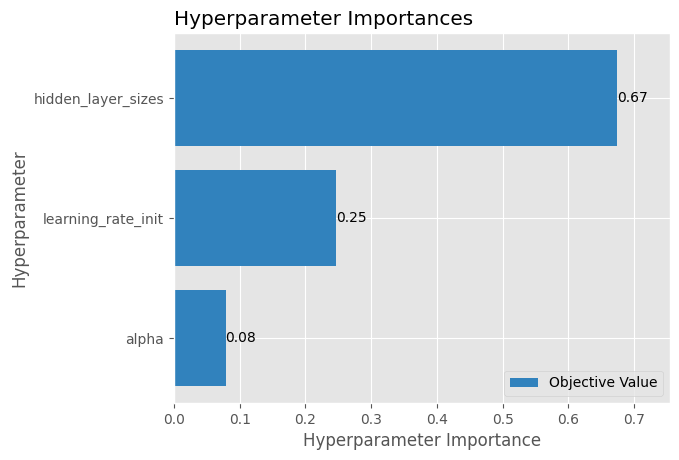

In [10]:
import optuna.visualization.matplotlib as vis
import matplotlib.pyplot as plt

# Visualización para XGBoost
fig_xgb = vis.plot_param_importances(study_xgb)
#fig_xgb.gca().set_title("Importancia de Hiperparámetros - XGBoost")
plt.show()

# Visualización para LightGBM
fig_lgb = vis.plot_param_importances(study_lgb)
#fig_lgb.gca().set_title("Importancia de Hiperparámetros - LightGBM")
plt.show()

# Visualización para Red Neuronal
fig_nn = vis.plot_param_importances(study_nn)
#fig_nn.gca().set_title("Importancia de Hiperparámetros - MLPClassifier")
plt.show()